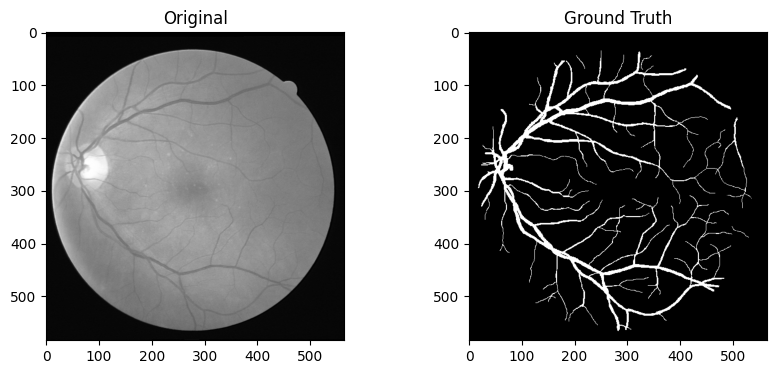

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/21_training.tif"
truth_path = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual/21_manual1.gif"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(truth_path, cv2.IMREAD_GRAYSCALE)

gt = (gt > 0).astype(np.uint8) # used this as it converts 255 to 1 helgful in threshoulding

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(gt, cmap='gray')
plt.title("Ground Truth")

plt.show()


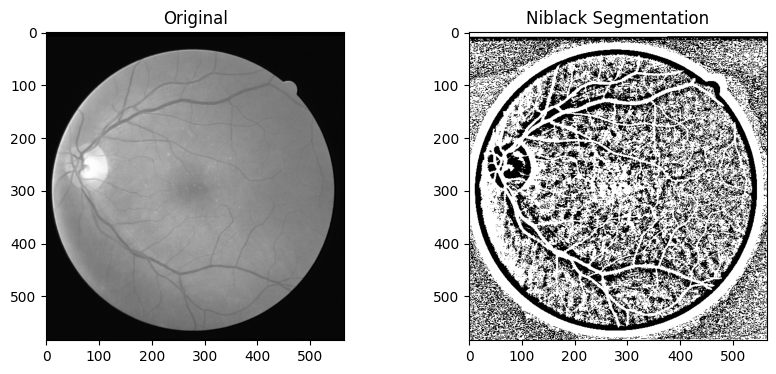

In [2]:
from skimage.filters import threshold_niblack

window_size = 25
k = -0.3

thresh_niblack = threshold_niblack(image, window_size, k)
mask_niblack = image < thresh_niblack # used < as truth nerve value was sedmented in white colour

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(mask_niblack, cmap='gray')
plt.title("Niblack Segmentation")

plt.show()



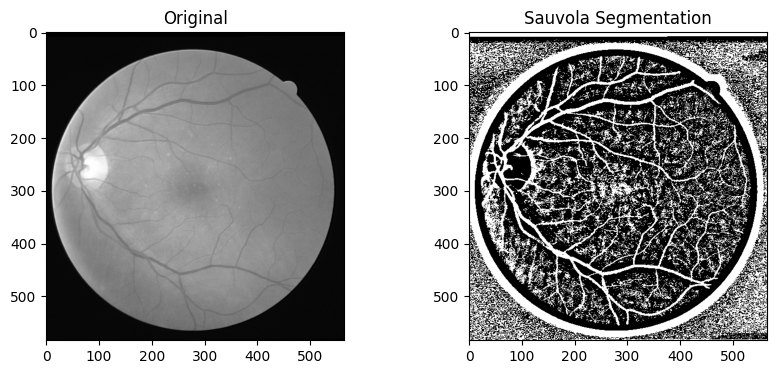

In [3]:
from skimage.filters import threshold_sauvola

window_size = 25
k = 0.01

thresh_sauvola = threshold_sauvola(image, window_size, k)
mask_sauvola = image < thresh_sauvola # used < as truth nerve value was sedmented in white colour

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(mask_sauvola, cmap='gray')
plt.title("Sauvola Segmentation")

plt.show()



**For both niblack segmentation and sauvola segmentation for k =0.01 and window size 25, both segmentation gives almost similar output so i thought to chesk what will be better values of k and window size(not only for this image for other images).**

**for every images we can judge with visual output so i will take range of k values and window size and extract best values based on sensitivity**

In [4]:

def sensitivity(gt, pred):

    gt_flat = gt.flatten()
    pred_flat = pred.flatten()

    TP = np.sum((gt_flat == 1) & (pred_flat == 1))
    FN = np.sum((gt_flat == 1) & (pred_flat == 0))

    return TP / (TP + FN + 1e-8)


In [5]:
window_sizes = [15, 25, 35, 51]
niblack_k_values = [-0.3, -0.2, -0.1, 0, 0.1]

best_niblack_score = 0
best_niblack_k = None
best_niblack_window = None

print("\nNiblack Results:\n")

for window in window_sizes:
    
    for k in niblack_k_values:
        
        thresh = threshold_niblack(image,
                                   window_size=window,
                                   k=k)
        
        pred = (image < thresh).astype(np.uint8)
        
        score = sensitivity(gt, pred)
        
        print("Window:", window,
              "k:", k,
              "Sensitivity:", score)
        
        if score > best_niblack_score:
            
            best_niblack_score = score
            best_niblack_k = k
            best_niblack_window = window


print("\nBest Niblack Parameters:")
print("Window:", best_niblack_window)
print("k:", best_niblack_k)
print("Best Sensitivity:", best_niblack_score)



Niblack Results:

Window: 15 k: -0.3 Sensitivity: 0.9245275367017095
Window: 15 k: -0.2 Sensitivity: 0.9054262308374947
Window: 15 k: -0.1 Sensitivity: 0.8837294184439598
Window: 15 k: 0 Sensitivity: 0.8595182091001462
Window: 15 k: 0.1 Sensitivity: 0.8352258901772912
Window: 25 k: -0.3 Sensitivity: 0.9306513099193241
Window: 25 k: -0.2 Sensitivity: 0.9143482845320324
Window: 25 k: -0.1 Sensitivity: 0.8949225403516526
Window: 25 k: 0 Sensitivity: 0.8720901938515402
Window: 25 k: 0.1 Sensitivity: 0.8499878335627991
Window: 35 k: -0.3 Sensitivity: 0.9241625435960239
Window: 35 k: -0.2 Sensitivity: 0.9051017925213297
Window: 35 k: -0.1 Sensitivity: 0.8852705004457436
Window: 35 k: 0 Sensitivity: 0.8636953524207707
Window: 35 k: 0.1 Sensitivity: 0.839484143076957
Window: 51 k: -0.3 Sensitivity: 0.9033173817824222
Window: 51 k: -0.2 Sensitivity: 0.8792278368071704
Window: 51 k: -0.1 Sensitivity: 0.8506772649846497
Window: 51 k: 0 Sensitivity: 0.8207072755289071
Window: 51 k: 0.1 Sensitivit

**based on above experiment- for window size = 25 and k = -0.3 we got more sensitivity** 

In [6]:
from skimage.filters import threshold_sauvola

k_values = [0.01, 0.05, 0.1, 0.2, 0.3]

best_score = 0

best_k = None
best_window = None

for window in window_sizes:
    
    for k in k_values:
        
        thresh = threshold_sauvola(image,
                                   window_size=window,
                                   k=k)
        
        pred = (image < thresh).astype(np.uint8)
        
        score = sensitivity(gt, pred)
        
        print("Window:", window,
              "k:", k,
              "Sensitivity:", score)
        
        if score > best_score:
            
            best_score = score
            best_k = k
            best_window = window

print("\nBest Parameters:")
print("Window:", best_window)
print("k:", best_k)
print("Best Sensitivity:", best_score)


Window: 15 k: 0.01 Sensitivity: 0.8136912969418388
Window: 15 k: 0.05 Sensitivity: 0.5242923189226522
Window: 15 k: 0.1 Sensitivity: 0.19539297591037577
Window: 15 k: 0.2 Sensitivity: 0.010909238381048379
Window: 15 k: 0.3 Sensitivity: 0.00028388352664438155
Window: 25 k: 0.01 Sensitivity: 0.8340092464916724
Window: 25 k: 0.05 Sensitivity: 0.583502311622766
Window: 25 k: 0.1 Sensitivity: 0.268553816205585
Window: 25 k: 0.2 Sensitivity: 0.033701030091640154
Window: 25 k: 0.3 Sensitivity: 0.0017844107389075414
Window: 35 k: 0.01 Sensitivity: 0.8270338226941247
Window: 35 k: 0.05 Sensitivity: 0.6011030902747176
Window: 35 k: 0.1 Sensitivity: 0.298361586503245
Window: 35 k: 0.2 Sensitivity: 0.04870630221427175
Window: 35 k: 0.3 Sensitivity: 0.0036093762673357088
Window: 51 k: 0.01 Sensitivity: 0.7871279098058288
Window: 51 k: 0.05 Sensitivity: 0.5802579284611159
Window: 51 k: 0.1 Sensitivity: 0.31515126936478416
Window: 51 k: 0.2 Sensitivity: 0.061683834860872054
Window: 51 k: 0.3 Sensitiv

**based on above experiment- for window size = 25 and k = 0.01 we got more sensitivity** 

In [7]:
sens_niblack = sensitivity(gt, mask_niblack)
sens_sauvola = sensitivity(gt, mask_sauvola)

print("Niblack Sensitivity:", sens_niblack)
print("Sauvola Sensitivity:", sens_sauvola)


Niblack Sensitivity: 0.9306513099193241
Sauvola Sensitivity: 0.8340092464916724


**the above sensitivity values are the best values choosen by using best values of k and window size**

In [8]:
import os

image_folder = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images"
gt_folder = "/kaggle/input/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual"

image_files = sorted(os.listdir(image_folder))

sens_niblack_list = []
sens_sauvola_list = []

for file in image_files:

    image_path = os.path.join(image_folder, file)

    gt_file = file.replace("_training.tif", "_manual1.gif")
    gt_path = os.path.join(gt_folder, gt_file)

    image = cv2.imread(image_path, 0)
    gt = cv2.imread(gt_path, 0)

    gt = (gt > 0).astype(np.uint8) 

    niblack_thresh = threshold_niblack(image, window_size=25, k=-0.3)
    sauvola_thresh = threshold_sauvola(image, window_size=25, k=0.01)

    niblack = (image < niblack_thresh)
    sauvola = (image < sauvola_thresh)

    sens_niblack_list.append(sensitivity(gt, niblack))
    sens_sauvola_list.append(sensitivity(gt, sauvola))


print("Average Niblack Sensitivity:", np.mean(sens_niblack_list))
print("Average Sauvola Sensitivity:", np.mean(sens_sauvola_list))


Average Niblack Sensitivity: 0.9151796186692067
Average Sauvola Sensitivity: 0.8028362203451076


**conclusion**, 
retinal blood vessels were extracted from fundus images using Niblack and Sauvola local thresholding methods on the DRIVE dataset.

Niblack achieved higher sensitivity than Sauvola, showing better ability to detect thin vessel structures. This demonstrates that local threshold parameters significantly affect segmentation performance, and Niblack is more effective for extracting fine vessels in retinal images.